# Data Project - Stock Market Analysis

Welcome to your first data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

#### Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [52]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
#import pandas.io.data as web
from pandas_datareader import data, wb

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
#from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [55]:
# The tech stocks we'll use for this analysis
# AAPL : Apple Inc.
# GOOG : Google
# MSFT : Microsoft
# AMZN : Amazon
# SSNLF : Samsung

tech_list = ['AAPL','GOOG','MSFT','AMZN','SSNLF']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
'''
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)
'''    
samsung_code = '005930'
#SSNLF_KS = web.DataReader("%s.KS" % (samsung_code), "yahoo", start, end)
SSNLF_KS = data.DataReader("%s.KS" % (samsung_code), "yahoo", start, end)

In [56]:
SSNLF_KS.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-07,1648000.0,1652000.0,1621000.0,1621000.0,1586203.000,191837.0
2016-09-08,1623000.0,1639000.0,1614000.0,1639000.0,1603816.500,241417.0
2016-09-09,1611000.0,1618000.0,1564000.0,1575000.0,1541190.375,265168.0
2016-09-12,1490000.0,1506000.0,1456000.0,1465000.0,1433551.750,529987.0


In [57]:
SSNLF_KS.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-01,2323000.0,2332000.0,2315000.0,2324000.0,2324000.0,212834.0
2017-09-04,2289000.0,2318000.0,2275000.0,2302000.0,2302000.0,158870.0
2017-09-05,2312000.0,2345000.0,2298000.0,2338000.0,2338000.0,234322.0
2017-09-06,2338000.0,2359000.0,2335000.0,2350000.0,2350000.0,216221.0
2017-09-07,2350000.0,2395000.0,2350000.0,2395000.0,2395000.0,66699.0


##### Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple
Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data 

In [59]:
# Summary Stats
SSNLF_KS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000
mean,2.009077e+06,2.030649e+06,1.994230e+06,2.013915e+06,1.998436e+06,241839.975806
std,3.049862e+05,3.039581e+05,3.021549e+05,3.028427e+05,3.153756e+05,104094.852963
min,1.490000e+06,1.506000e+06,1.456000e+06,1.465000e+06,1.433552e+06,66699.000000
25%,1.738250e+06,1.771000e+06,1.733000e+06,1.757250e+06,1.719528e+06,176174.750000
50%,2.006000e+06,2.026000e+06,2.001500e+06,2.010000e+06,1.997385e+06,217341.000000
75%,2.287250e+06,2.318000e+06,2.273500e+06,2.297250e+06,2.292192e+06,275834.750000
max,2.550000e+06,2.566000e+06,2.531000e+06,2.560000e+06,2.560000e+06,781771.000000


In [15]:
SSNLF_KS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000
mean,2.006081e+06,2.027605e+06,1.991194e+06,2.010887e+06,1.995265e+06,241999.540323
std,3.052728e+05,3.040274e+05,3.023486e+05,3.027809e+05,3.153345e+05,103739.992212
min,1.490000e+06,1.506000e+06,1.456000e+06,1.465000e+06,1.433552e+06,93012.000000
25%,1.732500e+06,1.766000e+06,1.732500e+06,1.751250e+06,1.713657e+06,175754.000000
50%,2.000000e+06,2.018500e+06,1.997000e+06,2.010000e+06,1.997385e+06,217336.500000
75%,2.284750e+06,2.316500e+06,2.273000e+06,2.297000e+06,2.290508e+06,275834.750000
max,2.550000e+06,2.566000e+06,2.531000e+06,2.560000e+06,2.560000e+06,781771.000000


In [60]:
# General Info
SSNLF_KS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2016-09-06 to 2017-09-07
Data columns (total 6 columns):
Open         248 non-null float64
High         248 non-null float64
Low          248 non-null float64
Close        248 non-null float64
Adj Close    248 non-null float64
Volume       248 non-null float64
dtypes: float64(6)
memory usage: 13.6 KB


###### Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks 

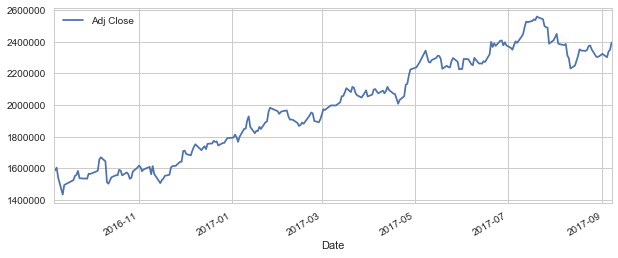

In [61]:
# Let's see a historical view of the closing price
SSNLF_KS['Adj Close'].plot(legend=True,figsize=(10,4))

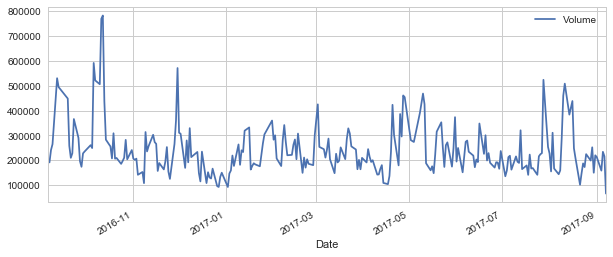

In [62]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
SSNLF_KS['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [63]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    SSNLF_KS[column_name]=pd.rolling_mean(SSNLF_KS['Adj Close'],ma)

/Users/jason/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/jason/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/jason/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


Now let's go ahead and plot all the additional Moving Averages

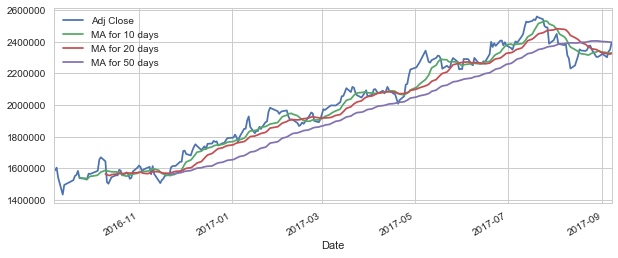

In [64]:
SSNLF_KS[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

Section 2 - Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Samsung stock.

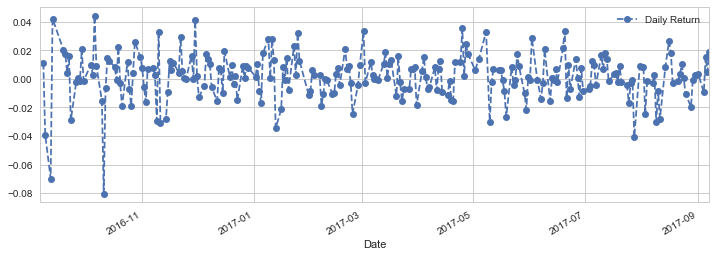

In [66]:
# We'll use pct_change to find the percent change for each day
SSNLF_KS['Daily Return'] = SSNLF_KS['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
SSNLF_KS['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

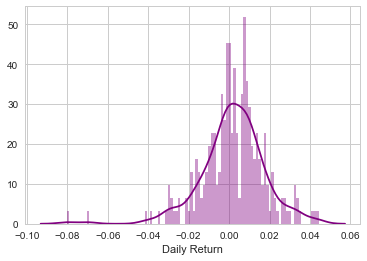

In [67]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(SSNLF_KS['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#SSNLF_KS['Daily Return'].hist()

In [68]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN','005930.KS'],'yahoo',start,end)['Adj Close']

In [69]:
closing_df.head()

,005930.KS,AAPL,AMZN,GOOG,MSFT
Date,,,,,
2016-09-06,NaN,105.833153,788.869995,780.080017,56.254715
2016-09-07,1586203.000,106.481720,784.479980,780.349976,56.303535
2016-09-08,1603816.500,103.690956,784.059998,775.320007,56.078945
2016-09-09,1541190.375,101.342369,760.140015,759.659973,54.887646
2016-09-12,1433551.750,103.612335,771.489990,769.020020,55.707886


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Samsung stock.

In [70]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

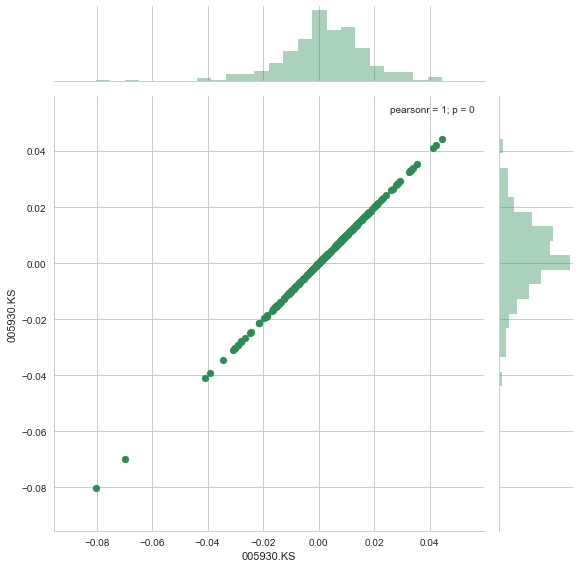

In [71]:
# Comparing Samsung to itself should show a perfectly linear relationship
sns.jointplot('005930.KS','005930.KS',tech_rets,kind='scatter',color='seagreen',size=8)

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Samsung and Apple the same way.

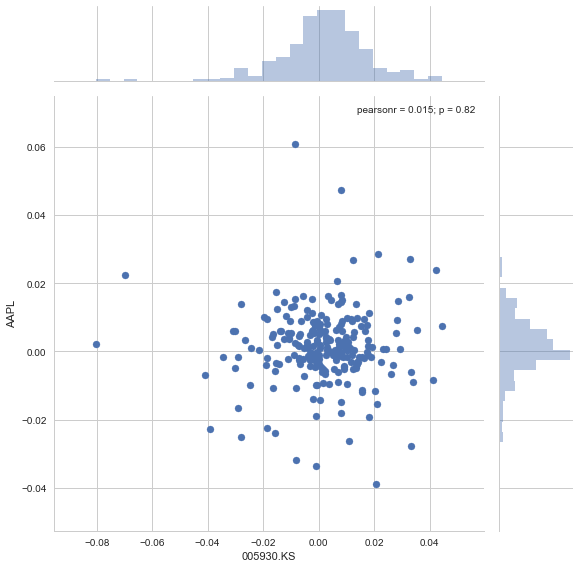

In [72]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('005930.KS','AAPL',tech_rets,kind='scatter',size=8)

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

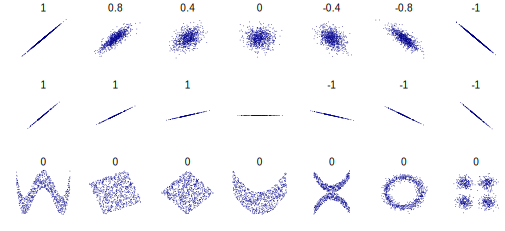

In [28]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

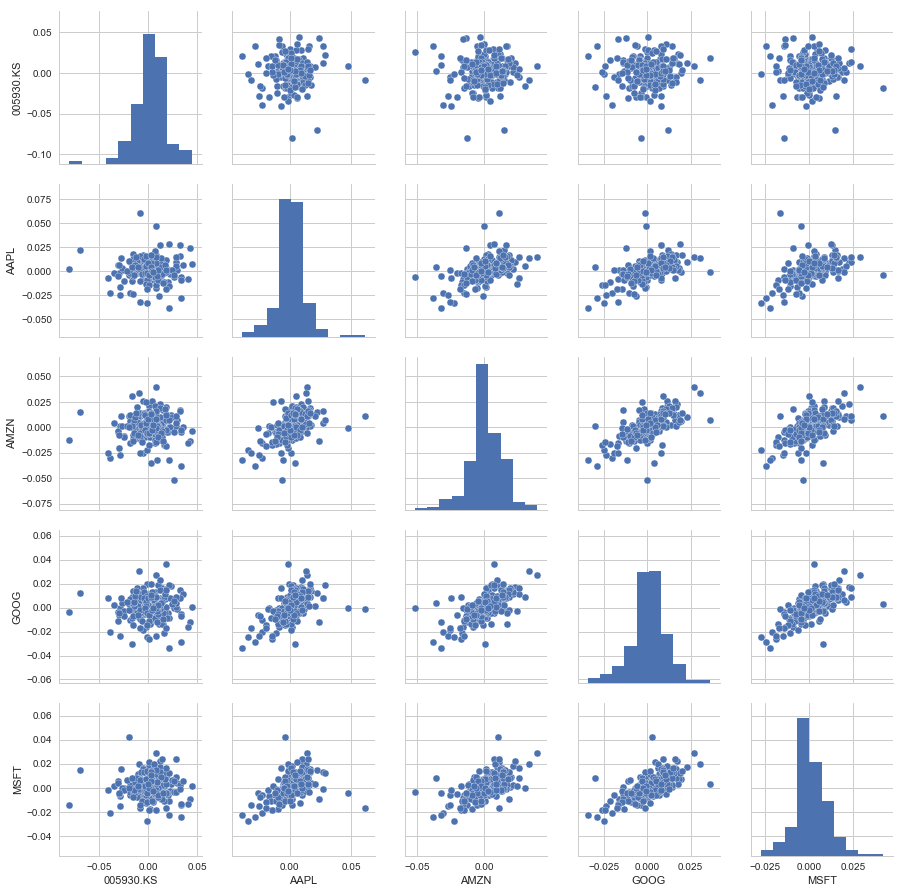

In [73]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

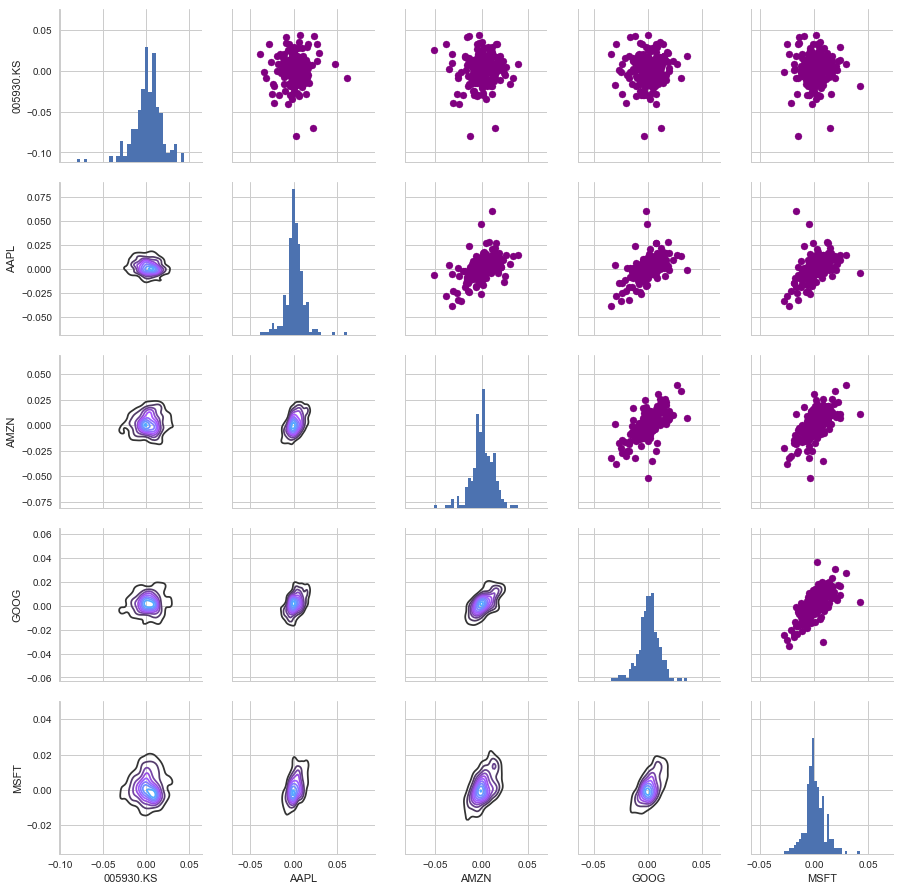

In [74]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

/Users/jason/anaconda/lib/python3.6/site-packages/seaborn/linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/jason/anaconda/lib/python3.6/site-packages/seaborn/linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


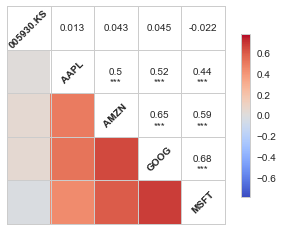

In [32]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
from seaborn.linearmodels import corrplot,symmatplot
#sns.corrplot(tech_rets.dropna(),annot=True)
corrplot(tech_rets.dropna(),annot=True)

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

Risk Analysis

here are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

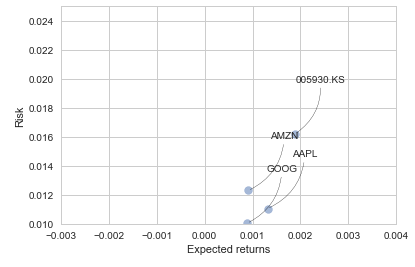

In [75]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

#### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

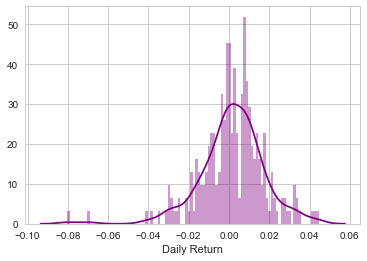

In [34]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(SSNLF_KS['Daily Return'].dropna(),bins=100,color='purple')

Now we can use quantile to get the risk value for the stock.

In [76]:
# The 0.05 empirical quantile of daily returns
rets['005930.KS'].quantile(0.05)

-0.026822457091179207

The 0.05 empirical quantile of daily returns is at -0.026. That means that with 95% confidence, our worst daily loss will not exceed 2.6%. If we have a 1 million WON investment, our one-day 5% VaR is 0.026 * 1,000,000 = 26,000 WON.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

#### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link:
http://www.investopedia.com/articles/07/montecarlo.asp



To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Samsung DataFrame SSNLF_KS('005930.KS).

In [77]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['005930.KS']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['005930.KS']

Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns

In [78]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Grate now let's put our function to work!

In [79]:
SSNLF_KS['Close'].tail()

Date
2017-09-01    2324000.0
2017-09-04    2302000.0
2017-09-05    2338000.0
2017-09-06    2350000.0
2017-09-07    2395000.0
Name: Close, dtype: float64

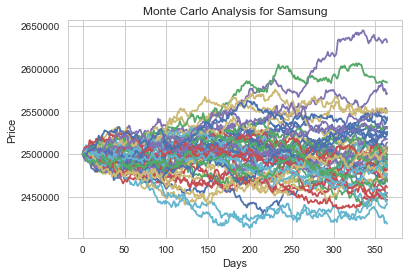

In [83]:
# Get start price from GOOG.head()
start_price = 2500000

for run in range(50):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Samsung')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [84]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.
For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

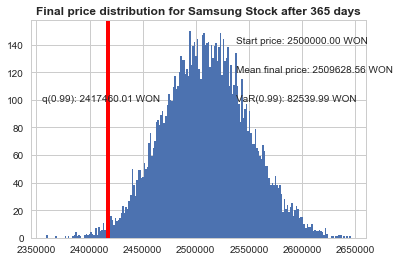

In [85]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: %.2f WON" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: %.2f WON" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): %.2f WON" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): %.2f WON" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Samsung Stock after %s days" % days, weight='bold');

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Samsung stock, which looks to be 82,539.99 WON for every investment of 2,500,000 (the price of one inital Samsung stock).

This basically menas for every initial stock you purchase your putting about 82,539.99 WON at risk 99% of the time from our Monte Carlo Simulation.

Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises for you to do:

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.